In [1]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

# pre-process
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv("ecommerce_csts.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe().round(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000,500.000,500.000,500.000,500.000
mean,33.053,12.052,37.060,3.533,499.314
std,0.993,0.994,1.010,0.999,79.315
min,29.532,8.508,33.914,0.270,256.671
25%,32.342,11.388,36.349,2.930,445.038
50%,33.082,11.983,37.069,3.534,498.888
75%,33.712,12.754,37.716,4.127,549.314
max,36.140,15.127,40.005,6.923,765.518


In [5]:
df.describe(include="O")

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,Teal
freq,1,1,7


In [6]:
cat_cols = df.select_dtypes(include="O").columns

for cat in cat_cols:
    print(f"name of the column: {df[cat].name}")
    print(f"number of uniques: {df[cat].nunique()}")
    print(f"uniques of the column: {df[cat].unique()}")
    print("_"*50)

name of the column: Email
number of uniques: 500
uniques of the column: ['mstephenson@fernandez.com' 'hduke@hotmail.com' 'pallen@yahoo.com'
 'riverarebecca@gmail.com' 'mstephens@davidson-herman.com'
 'alvareznancy@lucas.biz' 'katherine20@yahoo.com' 'awatkins@yahoo.com'
 'vchurch@walter-martinez.com' 'bonnie69@lin.biz' 'andrew06@peterson.com'
 'ryanwerner@freeman.biz' 'knelson@gmail.com' 'wrightpeter@yahoo.com'
 'taylormason@gmail.com' 'jstark@anderson.com' 'wjennings@gmail.com'
 'rebecca45@hale-bauer.biz' 'alejandro75@hotmail.com'
 'samuel46@love-west.net' 'megan33@gmail.com' 'agolden@yahoo.com'
 'vstafford@hotmail.com' 'denise22@hernandez-townsend.com'
 'youngbarbara@yahoo.com' 'william25@mcconnell.com'
 'ijones@schaefer-carr.net' 'heatherhall@yahoo.com'
 'tinasmith@martinez.info' 'chasejennifer@hotmail.com'
 'jenniferbarnett@gmail.com' 'jared39@hotmail.com'
 'briancarlson@page-fleming.com' 'joshuaodom@gmail.com'
 'vickie90@lee-wilson.com' 'duane56@hotmail.com' 'enash@gmail.com'
 'san

### Feature Extraction + EDA

In [7]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# Checking for Nans
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
# Drop irrelevant features
df.drop(['Email', "Address"], axis=1, inplace=True)

array([[<Axes: title={'center': 'Avg. Session Length'}>,
        <Axes: title={'center': 'Time on App'}>],
       [<Axes: title={'center': 'Time on Website'}>,
        <Axes: title={'center': 'Length of Membership'}>],
       [<Axes: title={'center': 'Yearly Amount Spent'}>, <Axes: >]],
      dtype=object)

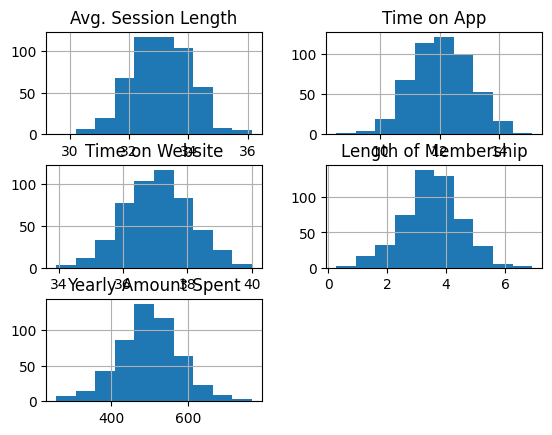

In [11]:
df.hist()

In [12]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: xlabel='member_cat', ylabel='count'>

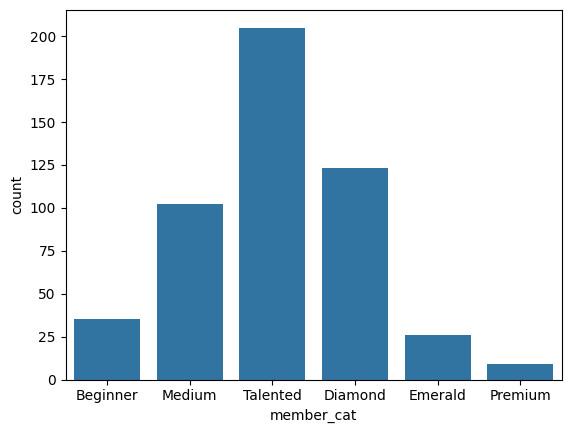

In [13]:
df['member_cat'] = pd.cut(x=df['Length of Membership'], 
        bins=[0.0, 2.0, 3.0, 4.0, 5.0, 5.5, np.inf],
        labels=["Beginner", "Medium", "Talented", "Diamond", "Emerald", "Premium"])
sns.countplot(x=df['member_cat'])

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop("Yearly Amount Spent", axis=1)
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True, stratify=df['member_cat'])

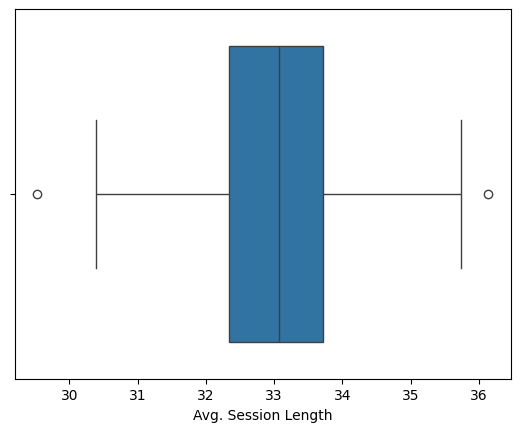

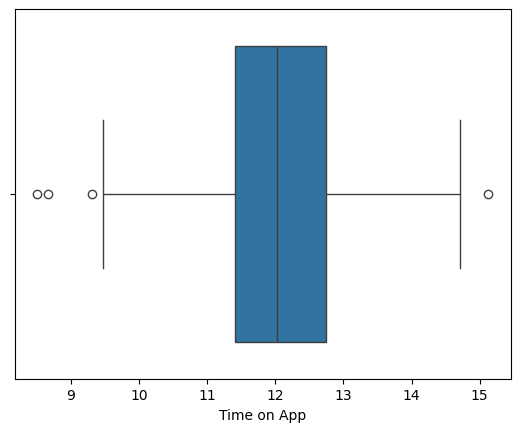

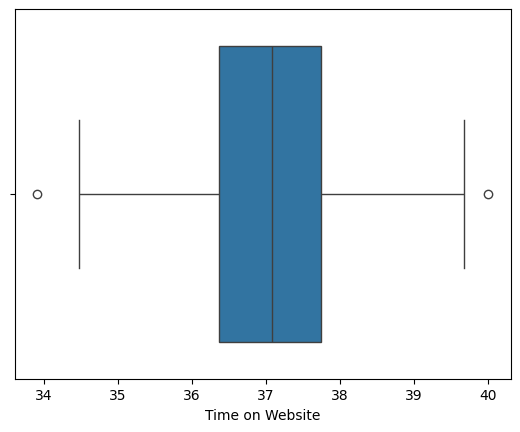

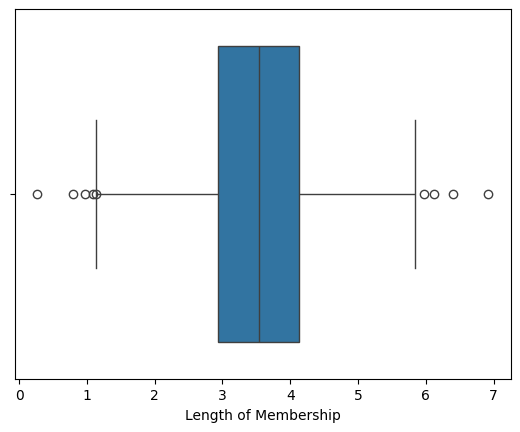

In [15]:
# checking for outliers in training data
num_colls = X_train.select_dtypes(include='number').columns
for col in num_colls:
    sns.boxplot(x=X_train[col])
    plt.show()

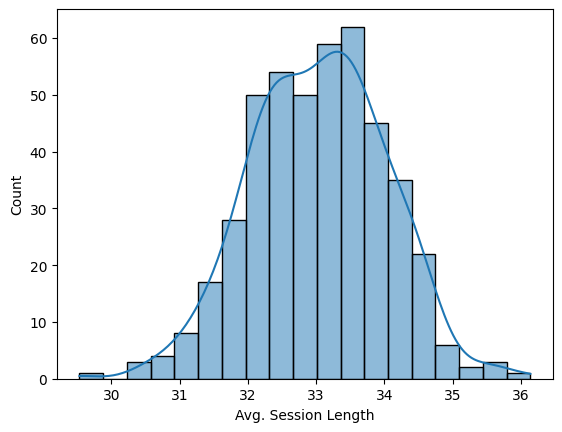

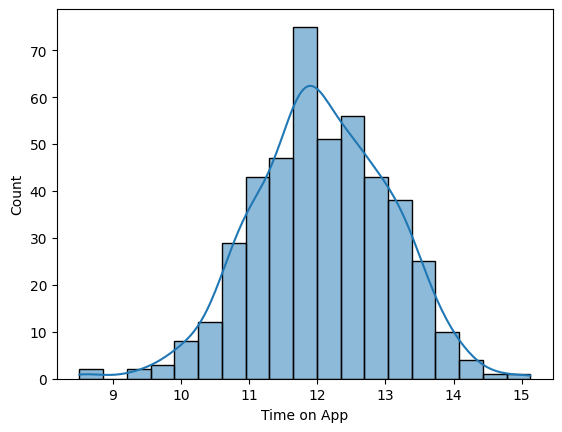

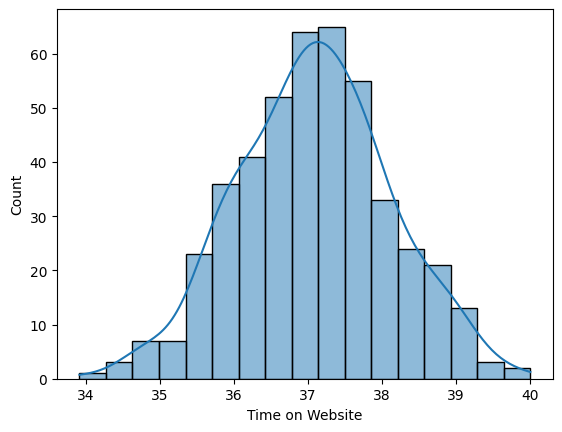

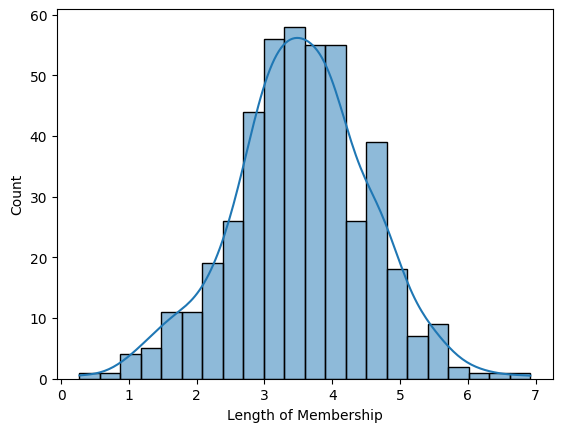

In [16]:
# checking if data is normally distributed
# checking for outliers in training data
num_colls = X_train.select_dtypes(include='number').columns
for col in num_colls:
    sns.histplot(x=X_train[col], kde=True)
    plt.show()

<Axes: >

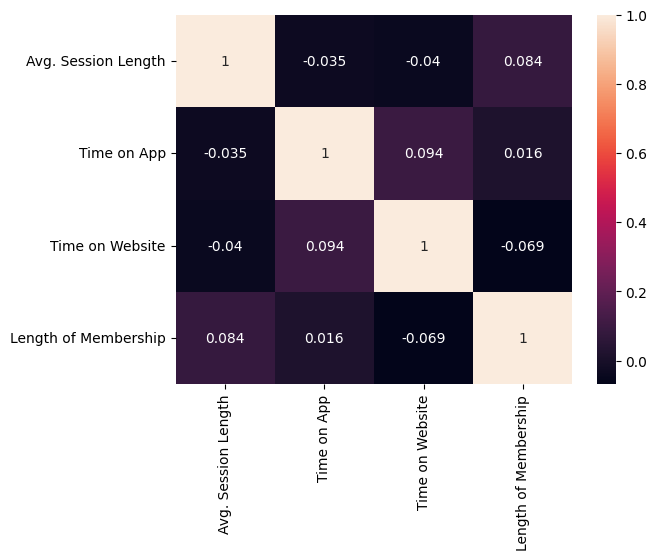

In [17]:
sns.heatmap(X_train.corr(numeric_only=True), annot=True)

### Pre-processing

In [18]:
X_train.isna().sum()

Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
member_cat              0
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer


In [20]:
median_imputer = SimpleImputer(strategy='median')
X_train[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] = median_imputer.fit_transform(X_train[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])
X_test[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']] = median_imputer.transform(X_test[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']])

mode_imputer = SimpleImputer(strategy='most_frequent')
X_test[['Avatar']] = mode_imputer.fit_transform(X_test[['Avatar']])
X_test[['Avatar']] = mode_imputer.transform(X_test[['Avatar']])

In [21]:
# x_train
def handle_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    ub = q3 + 1.5 * IQR
    lb = q1 - 1.5 * IQR
    data[data > ub] = ub
    data[data < lb] = lb
    return data, ub, lb


def handle_outliers_test(test_data, ub_train, lb_train):
    test_data[test_data > ub_train] = ub_train
    test_data[test_data < lb_train] = lb_train
    return test_data


outliers = X_train.select_dtypes(include='number').columns
for col in outliers:
    X_train[col], ub_train, lb_train = handle_outliers(X_train[col])
    X_test[col] = handle_outliers_test(X_test[col], ub_train, lb_train)
    
#Outiilers handled

C:\Users\ezzel\AppData\Local\Temp\ipykernel_7260\873544575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data > ub] = ub
C:\Users\ezzel\AppData\Local\Temp\ipykernel_7260\873544575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data < lb] = lb
C:\Users\ezzel\AppData\Local\Temp\ipykernel_7260\873544575.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data > ub_train] = ub_train
C:\Users\ezzel\AppDa

In [22]:
y_train, ub_train, lb_train = handle_outliers(y_train)
y_test = handle_outliers_test(y_test, ub_train, lb_train)

In [23]:
from category_encoders import BinaryEncoder

In [24]:
bin_encoder = BinaryEncoder()
n_df = bin_encoder.fit_transform(X_train[['Avatar']])
X_train = pd.concat([X_train, n_df], axis=1)
X_train.drop('Avatar', axis=1, inplace=True)

n_df_test = bin_encoder.transform(X_test[['Avatar']])
X_test = pd.concat([X_test,n_df_test], axis=1)
X_test.drop('Avatar', axis=1, inplace=True)

In [25]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership,member_cat,Avatar_0,Avatar_1,Avatar_2,Avatar_3,Avatar_4,Avatar_5,Avatar_6,Avatar_7
423,33.128693,10.398458,36.683393,3.859818,Talented,0,0,0,0,0,0,0,1
273,33.551699,12.158585,36.575134,5.453969,Emerald,0,0,0,0,0,0,1,0
100,32.498393,13.410759,35.990489,3.184619,Talented,0,0,0,0,0,0,1,1
282,31.654810,13.014459,37.789036,3.010210,Talented,0,0,0,0,0,1,0,0
299,30.492537,11.562936,35.976565,1.481617,Beginner,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,32.711119,12.326291,36.673878,3.350279,Talented,0,0,1,1,1,0,0,0
435,32.259973,14.132893,37.023479,3.762070,Talented,0,0,0,1,1,1,0,1
415,31.517122,10.745189,38.791235,1.428824,Beginner,0,1,0,0,0,1,1,1
303,30.816201,11.851399,36.925043,1.139017,Beginner,0,1,0,0,1,0,1,0


In [26]:
X_train.drop('member_cat', axis=1, inplace=True)
X_test.drop('member_cat', axis=1, inplace=True)

### Modeling

In [27]:
from sklearn.linear_model import LinearRegression #small data
from sklearn.linear_model import SGDRegressor #large data

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
model.coef_

array([ 2.58078787e+01,  3.85507167e+01,  4.60892464e-01,  6.22157055e+01,
        3.27807846e+00,  6.98526632e-01, -9.61573006e-01,  7.83976805e-01,
       -1.43905566e+00,  1.76922198e+00, -8.67452057e-01, -3.87964593e-02])

In [30]:
model.score(X_test, y_test)

0.9803928308418562

In [31]:
y_train_pred = model.predict(X_train)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [32]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9816692401736283

In [33]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred)

111.53446082767623

In [34]:
np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))

np.float64(10.560987682393925)

In [35]:
mean_absolute_error(y_true=y_train, y_pred=y_train_pred)

8.132089305394665